<font face="Verdana, cursive, sans-serif" >
<h1><center>Creating stock sentiment index from company news</center></h1>

<b>Author: Siraprapa Watakit</b>
<br><b>Last edited: November 2018</b>
<p><b>Synopsis:</b></p>

<p>This python notebook is a part of a working paper <b>"The Public and Private Life of Big Data",Pavabutr and Watakit(2018)</b>. This notebook demonstrates a step-by-step sentiment index creation from company news. </p>

<p>The following libraries are required for the project</p>
<ul>
   <li><code>panda,numpy</code>&nbsp; For dataframe, vector and matrix processing</li>
   <li><code>BeautifulSoup</code> &nbsp;  For HTML data parsing</li>
   <li><code>nltk,corpus</code> &nbsp; For nature language processing </li>
   <li><code>matplotlib,wordcloud</code> &nbsp; For data visulization </li>
</ul>


<p>Note that <code>nltk,corpus</code> has to be installed manually. Please refer to <code>Anaconda</code> or <code>pip</code> installation manaul </p>

<p><b>Disclaimer:</b>This material is for informational and educational purposes only. </p>



<font face="Verdana, cursive, sans-serif" >
<h2>What is natural language processing?</h2>


<p>Natural language processing is a sub field of computer science. The purpose of this sub-field is to make computers understand human language so that it can performance certain tasks. Example of applications of NLP are document summarisation, translation, chatbots and sentimental analysis. In order to make computer understand human language, the language must be convert to a sequence of binary (0,1). General NLP methodology involves (1) Lexical analysis: convert sentence to tokens, (2) Syntactic analysis: analyse and understand grammar structure and relationship between token, (3) Interpreting the meaning of a sentence; which require machine learning or deep learning methodologies. In this program, we specifically show simple tasks of natural language processing for sentiment analysis, step-by-step.</p>

<h2>What is sentiment analysis?</h2>
<p>Sentiment analysis is a process of gauging general opinion toward a certain topic. Sentiment analysis process usually involves aggregating freetext data and determines whether this freetext data is good sentiment or bad sentiment. The purpose of this program is to gently introduce reader to NLP and sentiment analysis by demonstrating an end-to-end process from data preparation -to- model creation -to- model excercution. Therefore, the following guidelines are by no means exhaustive.  </p>
<ol>
   <li>Identify credible source and extract the data from the source</li>
   <li>Data preparation: cleaning, remove stopwords, remove non-alphabetic characters, normalize charecter case to either lower or upper.</li>
    <li>Tokenization: convert a sentence to a vector of word</li>
    <li>Create a dictionary from vector of word</li>
    <li>Create a feature matrix</li>
    <li>Build and train model from feature matrix</li>
    <li>Score new data with the model</li>
</ol>

<p>We have a initial of 5,462 top-story news(Reuters) of SET50 stocks during (Jan/2014-Jun/2018). We remove irrelevant and duplicate news, and manually categorize news into 3 groups: good news, bad news, and neutral. In our final selection, we have a total of 1,914 news: 527(good), 262(bad), 1,125(neutral).<br> <br>Good news is represented by '1' and bad news is presented by '0' in our dataset</p>

<br>Guidelines 2-5 can be illustrated as follows:

<img src="./images/nlp_process_1.png" >

<br>Where <b>N</b> is the total number of news and <b>D</b> is the total number of words  

<p>Note that each numeric represents existence of words in documents. It can be calculated in various ways; among the commonly known are</p>

<ul>
    <li>Word count: each numeric is a total count of appearance of each word in a document</li>
    <li>Word proportion : each numeric is an average weight of a word in a document</li>
    <li>Term frequnecy inverse document frequency(TF-IDF): each numeric represent an importaness of a word in a document relative to other words in the whole collection of documents.</li>
</ul>

In the next section, we demonstrate a step-by-step programming in 2 approach:

<ul>
    <li>Apporach 1 Longhand Programming, starting from the scratch until modeling</li>
    <li>Apporach 2 Shorthand Programming, demonstraing the utilization of python library</li>
</ul>


<font face="Verdana, cursive, sans-serif">
<h1><b><center>Approach 1 Longhand Programming</center></b></h1>

<b>Feature matrix : Word Proportion</b>


<font face="Verdana, cursive, sans-serif">
<b>Step 1 Import libraries</b>


In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

<font face="Verdana, cursive, sans-serif">
<b>Step 2 Prepare stopword list and define utility functions </b>
<p><b>stopwords</b> are words which have no sentiment meaning such "as is, am, are,a ,an ,the". These words must be removed in order to minimise the size of feature matrix.</p>
<p>
<ul>
    <li><code>text_preprocess_tokenizer()</code> this function pre-process a sentence and tokenize it </li>
    <li><code>tokens_to_vector()</code> this function convert all tokens to vectors</li>
    <li><code>visualize()</code> wordcloud visulization tool</li>
</ul>

In [2]:
#prepare stopwords
#import stopwrds from nltk, and add some more
stopwords = set(stopwords.words("english"))
stocklists = set(w.rstrip().lower()+'.bk' for w in open('./input/tickersSET.csv',encoding="utf8"))
stopwords = stopwords.union(stocklists)
stopwords = stopwords.union({'bangkok','thailand','reuters','thomson reuters','ptt','pcl','banpu','baht','said','central','karnchang','plaza','passenger','pattana'
                             ,'airport','charoen','pokphand','hotel','tourism','assurance','life','sophonpanich','chatri','dusit','food','choedchu','airway','mhz','advanced','info','medical','hospital'
                             ,'bts','mayo','polyclinic','thai','percent','company','million','billion','share','year','bank','italian','petrochemical'})


# preprocess text : clean/remove/convert a text to a list of token
def text_preprocess_tokenizer(s):
    wordnet_lemmatizer = WordNetLemmatizer()
    s = s.lower()                              #1 lower it all
    s = s.replace('buzz-','')                  #2 remove reuters keywords
    s = s.replace('brief-','')                 
    s = s.replace('update-1','')               
    s = s.replace('corrected-','')  
    s = s.replace('full story','')
    s = ''.join([i for i in s if not i.isdigit()])  #3 remove digit    
    s = ''.join([i for i in s if s not in string.punctuation]) #4 remove punctuation
    tokens = nltk.tokenize.word_tokenize(s)         #5 tokennize it
    tokens = [t for t in tokens if len(t)>3]        #6 keep only words length>3
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]  #7 lemmatize it, return a word to its basic form
    tokens = [t for t in tokens if t not in stopwords]          #8 remove stopwords
    return tokens

word_index_map = {}
current_index = 0

#convert word tokens to feature vector: propoertion method
def tokens_to_vector(tokens,label):
    x=np.zeros(len(word_index_map)+1)
    for t in tokens:
        i = word_index_map[t]
        x[i] += 1
    x = x/x.sum() 
    x[-1] = label
    return x

# visualize the data
def visualize(data,title):
  words = ''
  for row in data:
      for msg in row:
          words += msg + ' '
  wordcloud = WordCloud(width=600, height=400).generate(words)
  plt.imshow(wordcloud)
  plt.title("{}".format(title))
  plt.axis('off')
  plt.show()


<font face="Verdana, cursive, sans-serif">
<b>Step 3 Data pre-posessing, tokensizing and dictionary creation</b>
<p>In this step, we iterate through each news item: pre-process it, tokenize it, as well as building up a dictionary; all at the same time. <br>Note that <code>word_index_map</code> is the <b>dictionary</b>, which will be used to create feature matric in the step.

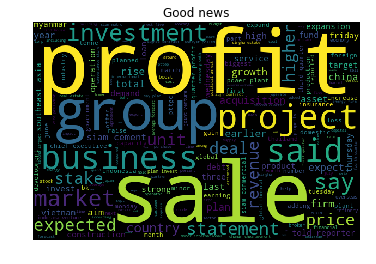

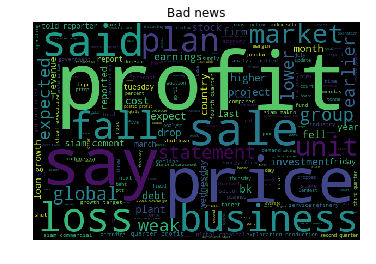

In [3]:
#%% Data preparation
news = pd.read_csv("./input/rtnews_topstory_labeled.csv",sep="|")
news['fulltext'] = news['title']+news['body']
news = news.drop_duplicates(subset=['fulltext'],keep='last')
news = news[(news['label']==1) | (news['label']==0) ]
goodnews = news[news['label']==1]['fulltext'].tolist()
badnews = news[news['label']==0]['fulltext'].tolist()

#tokenized string
goodnews_tokenized = []
badnews_tokenized = []

for news in goodnews:
    tokens = text_preprocess_tokenizer(news)
    goodnews_tokenized.append(tokens)
    for token in tokens:
        if token not in word_index_map:
            word_index_map[token]=current_index
            current_index+=1

for news in badnews:
    tokens = text_preprocess_tokenizer(news)
    badnews_tokenized.append(tokens)
    for token in tokens:
        if token not in word_index_map:
            word_index_map[token]=current_index
            current_index+=1

#let's see what stands out in good news and bad news
visualize(goodnews_tokenized,"Good news")
visualize(badnews_tokenized,"Bad news")

<font face="Verdana, cursive, sans-serif">
<b>Step 4 Create feature matrix</b>
<p>Convert tokenized vectors to feature matrix. Note that this feature matrix is also called "bag-of-words" or "term-document" matrix.

In [4]:
#%% Create a feature matrix.
N = len(goodnews_tokenized) + len(badnews_tokenized)
data = np.zeros((N, len(word_index_map) + 1)) 
i = 0
for tokens in goodnews_tokenized:
    xy = tokens_to_vector(tokens, 1)
    data[i,:] = xy
    i += 1

for tokens in badnews_tokenized:
    xy = tokens_to_vector(tokens, 0)
    data[i,:] = xy
    i += 1

<font face="Verdana, cursive, sans-serif">
<b>Step 5 Create train and test feature matric</b>
<p>We utiliize the following libaries to 
 <ul>
    <li><code>sklearn.model_selection.train_test_split</code> to randomly split the feature matric into a train and test matric</li>
     <li><code>sklearn.metrics.classification_report,sklearn.metrics.classification_report </code> to print out the model performance report</li>
</ul>

In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X = data[:,:-1] # X is everyhting, except last column
y = data[:,-1]  # y is the last column.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

<font face="Verdana, cursive, sans-serif">
<b>Step 6 Build a model</b>

<p><b>To learn more about machine learning, please refer to  <a href="http://scikit-learn.org/stable/index.html">Scikit-Learn: Machine Learning in Python</a></b>

<p><font color="red"><b>Logistic Regression</b></font>

In [6]:
#%% model-1: Logistic regression
from sklearn.linear_model import LogisticRegression
model_logit = LogisticRegression()
model_logit.fit(X_train,y_train)
y_pred_model_logit = model_logit.predict(X_test)
y_prob_model_logit = model_logit.predict_proba(X_test)
print("\nLogistic regression")
print("="*20)
print("Test accuracy score : ",accuracy_score(y_test,y_pred_model_logit))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_model_logit))
print("Test classification report :  \n",classification_report(y_test,y_pred_model_logit))


Logistic regression
Test accuracy score :  0.7083333333333334
Test confusion matrix : 
 [[  0  42]
 [  0 102]]
Test classification report :  
              precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        42
        1.0       0.71      1.00      0.83       102

avg / total       0.50      0.71      0.59       144



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<font face="Verdana, cursive, sans-serif">

<img src="./images/confuse.png" >

<b>Interpretation</b>
<ul>
    <li><b>Accuracy</b> measurse an overall performance of the model. How well a model correctly classifies true positive and true negative.</li>
    <li><b>Precision</b> measures how precisely a model idenitifies true positive as actual true positive.<br>[TP / (TP + FP)]</li>
    <li><b>Recall(true positive rate or sensitivity)</b> measures how well a model captures all actual true positive.<br>[Recall = TP / (TP + FN))]</li>
    <li><b>F1-Score</b> Harmonic mean (Precision, Recall)]</li>
</ul>

<p>That is, the logistic regression accuracy is 71%. It correctly identifies good news 50% of the time, it captures 71% of all the good news in the <b>test dataset</b>.


<p><b>Estimates Vectors</b>
<p>Each column index represents each word in the feature matic. Similar to any logistic regression problem, the estimated coefficient suggest the impact of each feature to the likelihood of p(y=1|x1,x2,x3..) 

In [7]:
#%% top keywords by model
threshold = 0.05
word_list = []
weight_list = []
for word, index in word_index_map.items():
    weight = model_logit.coef_[0][index]
    if weight > threshold or weight < -threshold:
        word_list.append(word)
        weight_list.append(weight)
        
wordweight = pd.DataFrame(data=[word_list,weight_list])
wordweight = wordweight.transpose()
wordweight.columns = ['word','weight']
wordweight = wordweight.sort_values(by='weight',ascending=False)
print("\nTop words associated with good news")
print(wordweight.head(10))
print("\nTop words associated with bad news")
print(wordweight.tail(10))


Top words associated with good news
             word    weight
212      contract  0.941109
96   construction  0.616432
216        signed   0.55993
27         invest  0.557905
73    development  0.474248
119         group  0.468504
213          sign  0.422119
214     agreement  0.406751
72        project  0.395911
281       venture  0.388836

Top words associated with bad news
           word    weight
4       service -0.367711
218       qtrly -0.388442
238        weak -0.406618
332    shutdown -0.438845
190  production -0.442947
171        drop -0.529812
143      versus -0.543321
256        fall -0.855269
1        profit -0.965329
173        loss   -1.0088


<font face="Verdana, cursive, sans-serif">
<p>For each news item, the proabability of being a good news is calculated by the following equation
<img src="./images/logit_prob.png" >
where beta is the intercept term and alpha(s) are the coefficients of features

<p><font color="red"><b>Decision Tree</b></font>

In [8]:
#%% model-2: decision tree
from sklearn.tree import DecisionTreeClassifier
model_dtree= DecisionTreeClassifier()
model_dtree.fit(X_train,y_train)
y_pred_model_dtree = model_dtree.predict(X_test)
y_prob_model_dtree = model_dtree.predict_proba(X_test)
print("\nDecision tree")
print("="*20)
print("Test accuracy score : ",accuracy_score(y_test,y_pred_model_dtree))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_model_dtree))
print("Test classification report : \n ",classification_report(y_test,y_pred_model_dtree))


Decision tree
Test accuracy score :  0.7569444444444444
Test confusion matrix : 
 [[26 16]
 [19 83]]
Test classification report : 
               precision    recall  f1-score   support

        0.0       0.58      0.62      0.60        42
        1.0       0.84      0.81      0.83       102

avg / total       0.76      0.76      0.76       144



<p><font color="red"><b>Random Forest</b></font>

In [9]:
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier(n_estimators=300)
model_forest.fit(X_train, y_train)
y_pred_model_forest = model_forest.predict(X_test)
print("\nRandom Forest")
print("="*20)
print("Train classification rate:", model_forest.score(X_train,y_train))
print("Test accuracy score : ",accuracy_score(y_test,y_pred_model_forest))
print("Test confusion matrix : \n",confusion_matrix(y_test, y_pred_model_forest))
print("Test classification report :\n ",classification_report(y_test,y_pred_model_forest))


Random Forest
Train classification rate: 1.0
Test accuracy score :  0.7777777777777778
Test confusion matrix : 
 [[15 27]
 [ 5 97]]
Test classification report :
               precision    recall  f1-score   support

        0.0       0.75      0.36      0.48        42
        1.0       0.78      0.95      0.86       102

avg / total       0.77      0.78      0.75       144



<font face="Verdana, cursive, sans-serif">
<h1><b><center>Approach 2 Shorthand Programming </center></b></h1>

<b>Feature matrix : TF-IDF</b>

In this section, we demonstrate how to accomplish the whole process by using Python libraries, with Pipeline and without Pipeline functionality.



<font face="Verdana, cursive, sans-serif">
<b>Rebuild the data and import additional libraries</b>

In [10]:
#%% rebuild  data
news = pd.read_csv("./input/rtnews_topstory_labeled.csv",sep="|")
news['fulltext'] = news['title']+news['body']
news = news.drop_duplicates(subset=['fulltext'],keep='last')
news = news[(news['label']==1) | (news['label']==0) ]
goodnews = news[news['label']==1]['fulltext'].tolist()
badnews = news[news['label']==0]['fulltext'].tolist()

#split train and test data set
msg_train, msg_test, label_train, label_test = train_test_split(news['fulltext'], news['label'], test_size=0.2, random_state=1234)

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

<font face="Verdana, cursive, sans-serif">
<p><b>Create model *with out* Pipeline functionality</b>
<p>Suppose we would like to build sentiment analyzer with naive_bayes model. There are 2 steps to perform as follows:-
<ol>
<li>Fit and transform sentence to feature matrix</li>
<li>Fit the *model* with the data</li> 
</ol>

In [11]:
#1.Fit and transform sentence to feature matrix
bow_transformer = CountVectorizer(analyzer=text_preprocess_tokenizer).fit(news['fulltext'])
messages_bow = bow_transformer.transform(news['fulltext'])
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)

#2.Fit the naive_bayes model with the data
from sklearn.naive_bayes import MultinomialNB

goodbad_model = MultinomialNB().fit(messages_tfidf, news['label'])
print("Model classification rate:", goodbad_model.score(messages_tfidf,news['label']))

Model classification rate: 0.7796373779637378


<font face="Verdana, cursive, sans-serif">
<p><b>Create model *with* Pipeline functionality</b>
<p> With pipline functionality, we can shorthen the program even futher
<p><font color="red"><b>Logistic Regression wiht TF-IDF feature matrix</b></font>

In [12]:

pipeline_logit = Pipeline([
        ('bow',CountVectorizer(analyzer=text_preprocess_tokenizer)),
        ('tfid',TfidfTransformer()),
        ('classifier',LogisticRegression())
        ])

pipeline_logit.fit(msg_train,label_train)
pred_logit = pipeline_logit.predict(msg_test)
print("\nPipeline - Bag of words/Tfidf -  LogisticRegression")
print("="*50)
print("Train classification rate:", pipeline_logit.score(msg_train,label_train))
print("Test accuracy score : ",accuracy_score(label_test,pred_logit))
print("Test classification  report : \n",classification_report(pred_logit,label_test))


Pipeline - Bag of words/Tfidf -  LogisticRegression
Train classification rate: 0.8743455497382199
Test accuracy score :  0.7638888888888888
Test classification  report : 
              precision    recall  f1-score   support

          0       0.30      0.76      0.43        17
          1       0.96      0.76      0.85       127

avg / total       0.88      0.76      0.80       144



<p><font color="red"><b>Decision Tree with TF-IDF feature matrix</b></font>

In [13]:
pipeline_dtree = Pipeline([
        ('bow',CountVectorizer(analyzer=text_preprocess_tokenizer)),
        ('tfid',TfidfTransformer()),
        ('classifier',DecisionTreeClassifier())
        ])

pipeline_dtree.fit(msg_train,label_train)
pred_dtree = pipeline_dtree.predict(msg_test)
print("\nPipeline - Bag of words/Tfidf -  Decision Tree")
print("="*50)
print("Train classification rate:", pipeline_dtree.score(msg_train,label_train))
print("Test accuracy score : ",accuracy_score(label_test,pred_dtree))
print("Test classification  report : \n",classification_report(pred_dtree,label_test))


Pipeline - Bag of words/Tfidf -  Decision Tree
Train classification rate: 1.0
Test accuracy score :  0.75
Test classification  report : 
              precision    recall  f1-score   support

          0       0.53      0.59      0.56        39
          1       0.84      0.81      0.83       105

avg / total       0.76      0.75      0.75       144



<p><font color="red"><b>Random Forest with TF-IDF feature matrix</b></font>

In [14]:
pipeline_forest = Pipeline([
        ('bow',CountVectorizer(analyzer=text_preprocess_tokenizer)),
        ('tfid',TfidfTransformer()),
        ('classifier',RandomForestClassifier(n_estimators=300))
        ])

pipeline_forest.fit(msg_train,label_train)
pred_forest = pipeline_forest.predict(msg_test)
print("\nPipeline - Bag of words/Tfidf -  RandomForestClassifier(n_estimators=300)")
print("="*50)
print("Train classification rate:", pipeline_forest.score(msg_train,label_train))
print("Test accuracy score : ",accuracy_score(label_test,pred_forest))
print("Test classification  report : \n",classification_report(pred_forest,label_test))


Pipeline - Bag of words/Tfidf -  RandomForestClassifier(n_estimators=300)
Train classification rate: 1.0
Test accuracy score :  0.8333333333333334
Test classification  report : 
              precision    recall  f1-score   support

          0       0.53      0.85      0.66        27
          1       0.96      0.83      0.89       117

avg / total       0.88      0.83      0.85       144



<font face="Verdana, cursive, sans-serif">
<p><b>Final Step - Score the data with models</b>

In [15]:
#%% score al models on the dataset

news = pd.read_csv("./input/rtnews_topstory_labeled.csv",sep="|")
news['fulltext'] = news['title']+news['body']
news = news.drop_duplicates(subset=['fulltext'],keep='last')

news['proba_logit']=pipeline_logit.predict_proba(news['fulltext'] )[:,1]
news['proba_forest']=pipeline_forest.predict_proba(news['fulltext'] )[:,1]

news = news.drop(['fulltext'] , axis=1)

outfile_path="./output/"
filename_final_csv=outfile_path+"_rtnews_sentiment_.csv"
news.to_csv(filename_final_csv,sep='|',index=False,encoding='utf-8-sig')

In [16]:
news[(news['label']==1)].head(5)

,label,id,ticker,date,title,body,proba_logit,proba_forest
10,1,23,ADVANC,11022017,Thai telecoms firm AIS's profits up on more su...,"BANGKOK, Nov 2 (Reuters) - Advance Info Servic...",0.672481,0.886667
18,1,31,ADVANC,2062017,BRIEF-Thai Advanced Info Pcl says believes int...,Feb 6 (Reuters) - Thai Advanced Info Pcl CEO S...,0.788590,0.970000
22,1,35,ADVANC,7042016,BRIEF-Advanced Info Service says AWN officiall...,"On 27 may 2016, Advanced Wireless Network Co.,...",0.681237,0.836667
29,1,42,ADVANC,2112016,BRIEF-Thai AIS aims 10 mln 4G subscribers by e...,The company aims 10 million 4G subscribers by ...,0.749487,0.863333
30,1,43,ADVANC,1262016,BRIEF-AIS,Jan 26 (Reuters) - Advanced Info Service Pcl C...,0.757538,0.923333


In [17]:
news[(news['label']==0)].head(5)

,label,id,ticker,date,title,body,proba_logit,proba_forest
0,0,3,ADVANC,6152018,BRIEF-Thai Telco Advanced Info Service Says Wi...,15-Jun-2018 12:44:35 - THAI MOBILE OPERATOR AD...,0.440865,0.266667
1,0,4,ADVANC,6152018,BRIEF-Advanced Info Service To Not Participate...,ADVANCED INFO SERVICE -NOT PARTICIPATING IN UP...,0.440794,0.223333
4,0,16,ADVANC,2052018,Thai telco Advanced Info Service announces 2 p...,"BANGKOK, Feb 5 (Reuters) - Thailand's largest ...",0.315841,0.130000
5,0,17,ADVANC,2052018,BRIEF-Advanced Info Service Posts FY Net Profi...,ADVANCED INFO SERVICE PCL - FY TOTAL REV 157.7...,0.470574,0.213333
33,0,46,ADVANC,3182015,"BUZZ-Thai AIS, Total Access retreat; key panel...",Advanced Info Service Pcl ADVANC.BK shares fal...,0.526919,0.416667


<font face="Verdana, cursive, sans-serif" >
<h1><center>Conclusion</center></h1>

The purpose of this program is to demonstrate a basic steps of NLP. Below table summarise the performance of each model by each type of feature matrix. It is shown that TF-IDF with Random Forest etimating technique outperform all other models by approximately 10% - However, this demonstration is not with out major critigues on both data and methods.

<img src="./images/comparematric.png" >

<b>Data Critiques</b>
<p>The most important part of this project is the reliability and credibility of the source of the data. We select Reuters news due to its reptutation of unbiasness. We label each news as good, bas, neutral based on its title and body content, which maybe subjective to the eyes of the readers. In total, we have only 1,914 news coverage of top SET 50 SET during 2014-2018/H1, more news from other local sources would have enhanced the robustnexs of the model </p>

<b>Modeling Critiques</b>
<p>As demonstrated in all 3 models, the probability of news being 1 (good news) or 0 (bad news) are based on the features and labels, the more occurance of positive(negative) words, the higher proability of it being a good(bad) news. All three model does not take into account the importance of the relationship between each word. To address this problem, we would need to apply deep learning technique.</p>

